In [1]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import cv2
import itertools
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/Data/archive.zip -d /content/Data

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/2/23798_right.jpeg  
  inflating: /content/Data/2/23817_left.jpeg  
  inflating: /content/Data/2/23817_right.jpeg  
  inflating: /content/Data/2/23821_left.jpeg  
  inflating: /content/Data/2/23821_right.jpeg  
  inflating: /content/Data/2/23852_left.jpeg  
  inflating: /content/Data/2/23854_left.jpeg  
  inflating: /content/Data/2/23905_left.jpeg  
  inflating: /content/Data/2/23905_right.jpeg  
  inflating: /content/Data/2/23906_left.jpeg  
  inflating: /content/Data/2/23923_left.jpeg  
  inflating: /content/Data/2/23923_right.jpeg  
  inflating: /content/Data/2/23946_left.jpeg  
  inflating: /content/Data/2/23946_right.jpeg  
  inflating: /content/Data/2/23961_left.jpeg  
  inflating: /content/Data/2/23961_right.jpeg  
  inflating: /content/Data/2/23967_left.jpeg  
  inflating: /content/Data/2/23967_right.jpeg  
  inflating: /content/Data/2/239_left.jpeg  
  inflating: /content/Data/2/239_right.jpeg  
  in

In [4]:
# checking how many files/samples are in each class
path = '../content/Data' 
for i in range(5):
  folder_path = path+'/'+str(i)
  num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
  print(num_files)

25810
2443
5292
873
708


In [5]:
img_names = []
img_labels = []
for i in range(5):
  folder_path = path+'/'+str(i)
  img_names_new = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  num_files = len(img_names_new)
  img_labels_new = [i] * num_files


  img_names += img_names_new
  img_labels += img_labels_new

print(len(img_names))
print(len(img_labels))

35126
35126


In [6]:
df = pd.DataFrame(data={'img_name': img_names, 'label': img_labels})
df.to_csv('annotations.csv',index=False, header=True)

In [7]:
# """
# - creating the different sets with respective percentages
# - NOTE: dataset is imbalanced, used a fixed size of 700 for each set
# """
# # PREPROCESSING PARAMS
# TRAIN_SIZE = 700
# TEST_SIZE = 700
# VALID_SIZE = 700

# original_data_path = "../content/Data"
# # train_pct = 0.7
# # test_pct = 0.1
# # valid_pct = 0.2

# os.chdir("./")
# if os.path.isdir("train/0") is False:
#     # create folders for the sets
#     os.mkdir("./train")
#     # os.mkdir("./test")
#     # os.mkdir("./valid")
    
#     # move X number of instances from original set, to respective sets
#     for i in range(0, 5):
#         # path to inputs with different classes
#         num_folder_path = f'{original_data_path}/{i}' 
#         num_files_in_folder = len(os.listdir(num_folder_path))

#         train_size = TRAIN_SIZE
#         # test_size = TEST_SIZE
#         # valid_size = VALID_SIZE
        
#         # make classes within set
#         os.mkdir(f'train/{i}')
#         # os.mkdir(f'test/{i}')
#         # os.mkdir(f'valid/{i}')
        
#         # test_samples = random.sample(os.listdir(num_folder_path), test_size)
#         # for file_name in test_samples:
#         #     shutil.copy((f"../content/Data/{i}/{file_name}"), f'./test/{i}')

#         train_samples = random.sample(os.listdir(num_folder_path), train_size)
#         for file_name in train_samples:
#             shutil.copy((f"../content/Data/{i}/{file_name}"), f'./train/{i}')
            
#         # valid_samples = random.sample(os.listdir(num_folder_path), valid_size)
#         # for file_name in valid_samples:
#         #     shutil.copy((f"../content/Data/{i}/{file_name}"), f'./valid/{i}')

In [8]:
import shutil
import os
  
  
# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder):
      
    # Path
    path = os.path.join(parent_folder, folder_name)
      
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
    except OSError as error: 
        print(error)
  
# current folder path
current_folder = os.getcwd() 
  
# list of folders to be merged
# list_dir = ['/content/train/0', '/content/train/1', '/content/train/2', '/content/train/3', '/content/train/4']
list_dir = ['/content/Data/0', '/content/Data/1', '/content/Data/2', '/content/Data/3', '/content/Data/4']


# enumerate on list_dir to get the 
# content of all the folders ans store 
# it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    content_list[ list_dir[index] ] = os.listdir(path)
  
# folder in which all the content will
# be merged

# merge_folder = "merge_folder"
merge_folder = "training_data"
  
# merge_folder path - current_folder 
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder) 
  
# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)
  
# loop through the list of folders
for sub_dir in content_list:
  
    # loop through the contents of the 
    # list of folders
    for contents in content_list[sub_dir]:
  
        # make the path of the content to move 
        path_to_content = sub_dir + "/" + contents  
  
        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )
  
        # move the file
        shutil.move(dir_to_move, merge_folder_path)


merge_path = '/content/training_data'
# merged_imgs = [f for f in os.listdir(merge_path) if os.path.isfile(os.path.join(merge_path, f))]
# merged_imgs
# filtered_df = df.loc[df.img_name.isin(merged_imgs)]
# filtered_df.to_csv('filtered_annotations.csv',index=False, header=True)

In [9]:
from PIL import Image
from skimage import io
from skimage import exposure
def resize(PATH):
    images = os.listdir(PATH);
    # print(images)
    for image in images:
        name = PATH + image
        im = cv2.imread(name)
        # print(im)
        im = cv2.resize (im, (256, 256));
        cv2.imwrite(name, im)
def data_aug_val(path):
    listing_test = os.listdir(path)
    for file_name in listing_test:
      image = io.imread(path+file_name)
      # v_min, v_max = np.percentile(image, (0.2, 99.8))
      # better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
      log_correction_image = exposure.adjust_log(image)
      # sigmoid_correction_image = exposure.adjust_sigmoid(image)
      horizontal_flip = image[:, ::-1]
      #color_inversion_image_with_np = np.invert(image)
      #adjusted_gamma_image = exposure.adjust_gamma(image, gamma=0.4, gain=0.9)
      # io.imsave(path+str(1)+file_name,better_contrast)
      io.imsave(path+file_name,log_correction_image)
      # io.imsave(path+str(3)+file_name,sigmoid_correction_image)

In [10]:
path = '/content/training_data/'
resize(path)
data_aug_val(path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/27481_right.jpeg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/21118_left.jpeg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/10996_left.jpeg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/34689_left.jpeg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/766_left.jpeg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/41176_left.jpeg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: /content/training_data/43457_left.jpeg is a low contrast image
/usr/local/lib

In [11]:
from torch.utils.data import Dataset
import pandas as pd
import os
from PIL import Image
import torch

class DiabeticRetinopathy(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_id = self.annotations.iloc[index, 0]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[index, 1]))

        if self.transform is not None:
            img = self.transform(img)

        return (img, y_label)

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from tqdm import tqdm
import torchvision.models as models



import time
import torch.optim as optim
from torch.autograd import Variable
# GPU flag
use_gpu = torch.cuda.is_available()

degrees = [90, 270]
transform = transforms.Compose(
        [
            # transforms.Resize((512, 512)),
            # transforms.Resize((256, 256)),
            # transforms.RandomCrop((299, 299)),
            transforms.RandomRotation(degrees, resample=False, expand=False, center=None, fill=None),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )


# Hyperparameters
batch_size = 10
momentum = 0.95
# learning_rate = 0.05

learning_rate = 1e-3
wd = 1e-6

nr_classes = 5
nr_epochs = 10
loss_vctr = []
num_workers = 1
shuffle = True
pin_memory = True
# Load the model on the GPU
# densenet = DenseNet(nr_classes)
# densenet = models.densenet169(pretrained=True)


densenet = models.densenet169(pretrained=True)



if use_gpu:
  densenet.cuda()


# dataset = DiabeticRetinopathy("/content/merge_folder","filtered_annotations.csv",transform=transform)
dataset = DiabeticRetinopathy("/content/training_data","annotations.csv",transform=transform)

train_set, test_set = torch.utils.data.random_split(dataset,[24588,10538])
classes = (0, 1, 2, 3, 4)

trainloader = DataLoader(dataset=train_set, shuffle=shuffle, batch_size=batch_size,num_workers=num_workers,pin_memory=pin_memory)
testloader = DataLoader(dataset=test_set, shuffle=shuffle, batch_size=batch_size,num_workers=num_workers, pin_memory=pin_memory)


start = time.time()

# Oprimization Criteria and Optimization method
criterion = nn.CrossEntropyLoss().cuda() if use_gpu else nn.CrossEntropyLoss()
optimizer = optim.SGD(densenet.parameters(), lr=learning_rate, weight_decay=wd, momentum=momentum, nesterov = False)
# optimizer = optim.Adam(densenet.parameters(),lr=learning_rate,betas=(0.9,0.999),eps=1e-08,weight_decay=0,amsgrad=False)



/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1293: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. Please use 'interpolation' instead.
  "The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. "
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

In [13]:
# Training Loop
print("Start of the Optimization Processs..")
for epoch in range(nr_epochs):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = Variable(inputs).cuda() 
        labels = labels.long()
        labels = Variable(labels).cuda()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = densenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            loss_vctr.append(running_loss / 200)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    
print("^^^^^^^^^^^^^^^^^")
print('Finished Optimization.')
end = time.time() # Time counted in seconds
print("The total time to train the model on the K80 GPU is : {:.1f} minutes.".format((end - start)/60))

Start of the Optimization Processs..
[1,   200] loss: 1.578
[1,   400] loss: 0.963
[1,   600] loss: 0.932
[1,   800] loss: 0.931
[1,  1000] loss: 0.816
[1,  1200] loss: 0.850
[1,  1400] loss: 0.820
[1,  1600] loss: 0.830
[1,  1800] loss: 0.778
[1,  2000] loss: 0.895
[1,  2200] loss: 0.809
[1,  2400] loss: 0.805
[2,   200] loss: 0.841
[2,   400] loss: 0.795
[2,   600] loss: 0.767
[2,   800] loss: 0.802
[2,  1000] loss: 0.731
[2,  1200] loss: 0.760
[2,  1400] loss: 0.801
[2,  1600] loss: 0.805
[2,  1800] loss: 0.786
[2,  2000] loss: 0.772
[2,  2200] loss: 0.777
[2,  2400] loss: 0.740
[3,   200] loss: 0.771
[3,   400] loss: 0.722
[3,   600] loss: 0.716
[3,   800] loss: 0.775
[3,  1000] loss: 0.733
[3,  1200] loss: 0.743
[3,  1400] loss: 0.724
[3,  1600] loss: 0.750
[3,  1800] loss: 0.715
[3,  2000] loss: 0.759
[3,  2200] loss: 0.728
[3,  2400] loss: 0.746
[4,   200] loss: 0.710
[4,   400] loss: 0.752
[4,   600] loss: 0.701
[4,   800] loss: 0.724
[4,  1000] loss: 0.726
[4,  1200] loss: 0.6

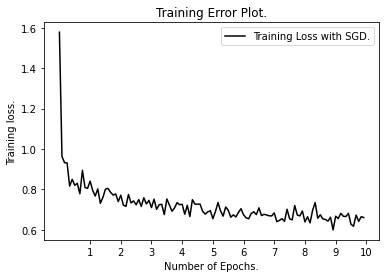

In [26]:
from matplotlib import pyplot as plt
import numpy as np

# epoch_num = 
x = range(120)
x_epoch = [z for z in range(1, 121) if z%12 == 0] 
x_ticks_labels = [str(x) for x in range(1, 11)]

plt.figure(1)
plt.plot(x, loss_vctr, color = 'k', label = "Training Loss with SGD.")
plt.xticks(x_epoch, x_ticks_labels)
plt.title("Training Error Plot.")
plt.ylabel("Training loss.")
plt.xlabel("Number of Epochs.")
plt.legend()
plt.savefig("trainingloss_densenet169SGD.png")  
plt.show()

In [22]:
correct = 0
total = 0

for data in testloader:
        
        images, labels = data
        # print(labels)
        images = Variable(images).cuda()
        outputs = densenet(images)
        _, predicted = torch.max(outputs.cpu().data, 1)
        # print(predicted)
        
        total += labels.size(0)
        correct += (predicted == labels).sum()

print(total)
print(correct) 
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))


10538
tensor(8246)
Accuracy of the network on the test images: 78 %
